<a href="https://colab.research.google.com/github/parthgiri01/WEEK-4-TEST/blob/main/LAB_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 9 Feature Selection

# Dr Mohamed Ihmeida

# 23rd July 2025


In [ ]:
# Before you start this lab, make sure you have uploaded the three csv files to your notebook.
# The csv files (datasets) are in the lab folder.



1.   What is Feature Selection?
2.   Why we need Feature Selection?




In [ ]:
1.What is Feature Selection?
ans:Feature Selection is the process of selecting a subset of the input variables that are most useful to predict the target variable.
by focusing on the most important features and ignoring the irrelevant
2.Why we need Feature Selection?
Improve Model Performance


Reduce Overfitting

Speed Up Training


Simplify Models


Reduce Data Storage and  Cost






3.  What are the benefits of Feature Selection?
4.  What are the methods of Feature Selection?



In [ ]:
ans:3
Improve Model Performance
Reduce Overfitting
Speed Up Training
Simplify Models
Reduce Data Storage and  Cost

ans:4
Filter
Wrapper
Embedded

5. What are the common method of feature selection?

In [ ]:
ans:5
Filter
Wrapper
EmbeddedAdd your answer here


In [ ]:
## The implementation without Feature Selection

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load and Preprocess Data

# Load the dataset from the uploaded file
df = pd.read_csv('/Cybersecurity Intrusion Detection.csv')

# Drop the session_id as it is an identifier and not a predictive feature
df = df.drop('session_id', axis=1)

# One-hot encode categorical features. This converts categories into a numerical format.
# drop_first=True helps avoid multicollinearity.
df_encoded = pd.get_dummies(df, columns=['protocol_type', 'encryption_used', 'browser_type'], drop_first=True)

# Separate features (X) from the target variable (y)
X = df_encoded.drop('attack_detected', axis=1)
y = df_encoded['attack_detected']

# Split data into training and testing sets (70% train, 30% test)
# stratify=y ensures the proportion of attacks is the same in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale numerical features for KNN
# KNN is sensitive to the scale of data, so we scale it.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Train and Evaluate K-Nearest Neighbors (KNN)

print("--- Training K-Nearest Neighbors (KNN) ---")
# Initialize the classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model on the scaled training data
knn.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_knn = knn.predict(X_test_scaled)

# Calculate and print the F1 score
f1_knn = f1_score(y_test, y_pred_knn)
print(f"\nF1 Score (KNN): {f1_knn:.4f}")

# Print a detailed classification report
print("\nClassification Report (KNN):")
print(classification_report(y_test, y_pred_knn))


# Train and Evaluate Decision Tree

print("\n--- Training Decision Tree Classifier ---")
# Initialize the classifier
# random_state=42 ensures the results are reproducible
dt = DecisionTreeClassifier(random_state=42)

# Train the model on the original (unscaled) training data
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt.predict(X_test)

# Calculate and print the F1 score
f1_dt = f1_score(y_test, y_pred_dt)
print(f"\nF1 Score (Decision Tree): {f1_dt:.4f}")

# Print a detailed classification report
print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))

--- Training K-Nearest Neighbors (KNN) ---

F1 Score (KNN): 0.7296

Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.76      0.92      0.83      1582
           1       0.86      0.63      0.73      1280

    accuracy                           0.79      2862
   macro avg       0.81      0.78      0.78      2862
weighted avg       0.80      0.79      0.78      2862


--- Training Decision Tree Classifier ---

F1 Score (Decision Tree): 0.7936

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1582
           1       0.80      0.79      0.79      1280

    accuracy                           0.82      2862
   macro avg       0.81      0.81      0.81      2862
weighted avg       0.82      0.82      0.82      2862



In [ ]:
## ## The implementation with Feature Selection

In [5]:
from sklearn.feature_selection import SelectKBest, chi2

# Load and Preprocess Data

# Load the dataset from the uploaded file
df = pd.read_csv('/Cybersecurity Intrusion Detection.csv')

# Drop the session_id as it is an identifier and not a predictive feature
df = df.drop('session_id', axis=1)

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=['protocol_type', 'encryption_used', 'browser_type'], drop_first=True)

# Separate features (X) from the target variable (y)
X = df_encoded.drop('attack_detected', axis=1)
y = df_encoded['attack_detected']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# Apply Feature Selection

# We will select the top 10 features using the chi2 score function.
k_best_count = 9
selector = SelectKBest(score_func=chi2, k=k_best_count)

# Fit the selector to the training data and transform it
X_train_kbest = selector.fit_transform(X_train, y_train)

# Transform the test data using the same fitted selector
X_test_kbest = selector.transform(X_test)

# Get the names of the selected features for reference
selected_features_mask = selector.get_support()
selected_features_names = X_train.columns[selected_features_mask]
print(f"Selected the top {k_best_count} features: {list(selected_features_names)}\n")


# Scale Selected Features for KNN

# KNN is sensitive to the scale of data, so we scale the selected features.
scaler = StandardScaler()
X_train_kbest_scaled = scaler.fit_transform(X_train_kbest)
X_test_kbest_scaled = scaler.transform(X_test_kbest)


# Train and Evaluate K-Nearest Neighbors (KNN) on Selected Features

print("--- Training K-Nearest Neighbors (KNN) on Selected Features ---")
# Initialize the classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model on the selected and scaled training data
knn.fit(X_train_kbest_scaled, y_train)

# Make predictions on the selected and scaled test data
y_pred_knn = knn.predict(X_test_kbest_scaled)

# Calculate and print the F1 score
f1_knn = f1_score(y_test, y_pred_knn)
print(f"\nF1 Score (KNN with Feature Selection): {f1_knn:.4f}")

# Print a detailed classification report
print("\nClassification Report (KNN with Feature Selection):")
print(classification_report(y_test, y_pred_knn))


# Train and Evaluate Decision Tree on Selected Features

print("\n--- Training Decision Tree on Selected Features ---")
# Initialize the classifier
dt = DecisionTreeClassifier(random_state=42)

# Train the model on the selected (but unscaled) training data
dt.fit(X_train_kbest, y_train)

# Make predictions on the selected test data
y_pred_dt = dt.predict(X_test_kbest)

# Calculate and print the F1 score
f1_dt = f1_score(y_test, y_pred_dt)
print(f"\nF1 Score (Decision Tree with Feature Selection): {f1_dt:.4f}")

# Print a detailed classification report
print("\nClassification Report (Decision Tree with Feature Selection):")
print(classification_report(y_test, y_pred_dt))

Selected the top 9 features: ['network_packet_size', 'login_attempts', 'session_duration', 'ip_reputation_score', 'failed_logins', 'unusual_time_access', 'browser_type_Edge', 'browser_type_Firefox', 'browser_type_Unknown']

--- Training K-Nearest Neighbors (KNN) on Selected Features ---

F1 Score (KNN with Feature Selection): 0.7937

Classification Report (KNN with Feature Selection):
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1582
           1       0.91      0.71      0.79      1280

    accuracy                           0.84      2862
   macro avg       0.85      0.82      0.83      2862
weighted avg       0.85      0.84      0.83      2862


--- Training Decision Tree on Selected Features ---

F1 Score (Decision Tree with Feature Selection): 0.8008

Classification Report (Decision Tree with Feature Selection):
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1582
   

6. Comapre the F1 score for KNN and Decision Tree with and without feature selection.

7. Can you draw `bar-chat` for each F1 score?

8. Try to change k_best_count and observe F1-Score

9. Consider the number of features with F1-Score. Draw the realtionship between k_best_count and F1-Score.

F1 Score without FS - KNN: 0.7296, Decision Tree: 0.7936
F1 Score with FS (k=9) - KNN: 0.7937, Decision Tree: 0.8008


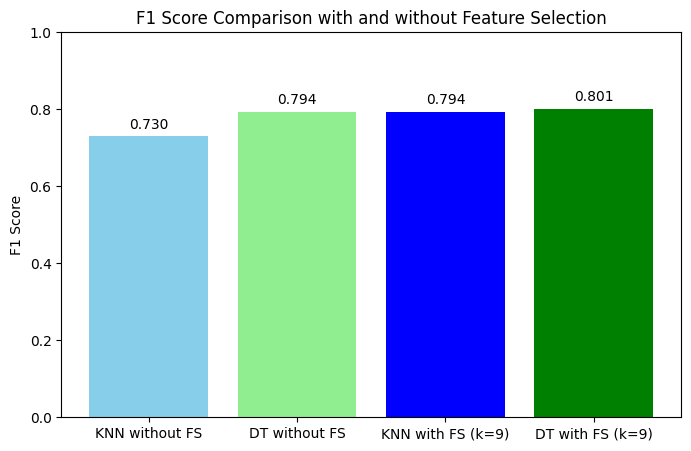

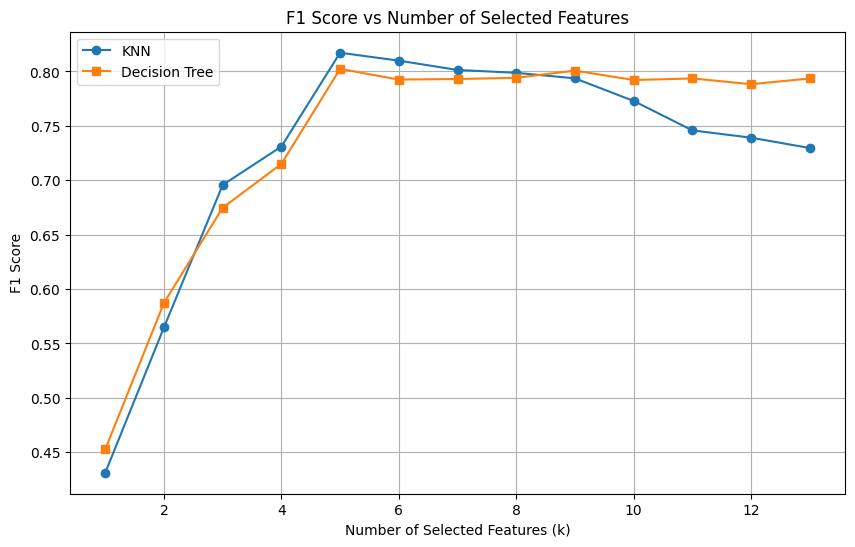

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2

df = pd.read_csv('/Cybersecurity Intrusion Detection.csv')
df = df.drop('session_id', axis=1)
df_encoded = pd.get_dummies(df, columns=['protocol_type', 'encryption_used', 'browser_type'], drop_first=True)
X = df_encoded.drop('attack_detected', axis=1)
y = df_encoded['attack_detected']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

def evaluate_models(X_train, X_test, y_train, y_test, scale_knn=True):

    if scale_knn:
        scaler = StandardScaler()
        X_train_knn = scaler.fit_transform(X_train)
        X_test_knn = scaler.transform(X_test)
    else:
        X_train_knn, X_test_knn = X_train, X_test


    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_knn, y_train)
    y_pred_knn = knn.predict(X_test_knn)
    f1_knn = f1_score(y_test, y_pred_knn)


    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    f1_dt = f1_score(y_test, y_pred_dt)

    return f1_knn, f1_dt

# 1.  without feature selection
f1_knn_no_fs, f1_dt_no_fs = evaluate_models(X_train, X_test, y_train, y_test)

# 2. Evaluate with feature selection
k_best_count = 9
selector = SelectKBest(score_func=chi2, k=k_best_count)
X_train_kbest = selector.fit_transform(X_train, y_train)
X_test_kbest = selector.transform(X_test)
f1_knn_fs, f1_dt_fs = evaluate_models(X_train_kbest, X_test_kbest, y_train, y_test)

print(f"F1 Score without FS - KNN: {f1_knn_no_fs:.4f}, Decision Tree: {f1_dt_no_fs:.4f}")
print(f"F1 Score with FS (k={k_best_count}) - KNN: {f1_knn_fs:.4f}, Decision Tree: {f1_dt_fs:.4f}")

# Plot bar chart comparing these four results
labels = ['KNN without FS', 'DT without FS', f'KNN with FS (k={k_best_count})', f'DT with FS (k={k_best_count})']
scores = [f1_knn_no_fs, f1_dt_no_fs, f1_knn_fs, f1_dt_fs]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue', 'lightgreen', 'blue', 'green'])
plt.ylim(0, 1)
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison with and without Feature Selection')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{yval:.3f}", ha='center')
plt.show()

# 3. Vary k_best_count
k_values = list(range(1, min(30, X_train.shape[1])+1))
f1_knn_scores = []
f1_dt_scores = []

for k in k_values:
    selector = SelectKBest(score_func=chi2, k=k)
    X_train_k = selector.fit_transform(X_train, y_train)
    X_test_k = selector.transform(X_test)
    f1_knn_k, f1_dt_k = evaluate_models(X_train_k, X_test_k, y_train, y_test)
    f1_knn_scores.append(f1_knn_k)
    f1_dt_scores.append(f1_dt_k)

plt.figure(figsize=(10,6))
plt.plot(k_values, f1_knn_scores, marker='o', label='KNN')
plt.plot(k_values, f1_dt_scores, marker='s', label='Decision Tree')
plt.xlabel('Number of Selected Features (k)')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Number of Selected Features')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
## ## The implementation without Feature Selection with NSL-KDD dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load Your Provided Train and Test Data
df_train = pd.read_csv('kdd_train.csv')
df_test = pd.read_csv('kdd_test.csv')
# print("Successfully loaded kdd_train.csv and kdd_test.csv.")


# Preprocess Data Consistently

# Store original lengths to split them back later
train_len = len(df_train)

# Combine for consistent encoding
df = pd.concat([df_train, df_test], ignore_index=True)

# Use LabelEncoder for categorical features
# This is simpler and sufficient for tree-based models
for col in ['protocol_type', 'service', 'flag']:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# Create a binary target variable: 1 for any attack, 0 for normal
df['attack'] = df['labels'].apply(lambda x: 0 if x == 'normal' else 1)
df = df.drop('labels', axis=1)

# Separate features from target
X = df.drop('attack', axis=1)
y = df['attack']

# Inject Noise Features
# We add 60 columns of random noise to simulate a high-dimensional environment
num_noise_features = 60
for i in range(num_noise_features):
    noise = np.random.rand(len(X))
    X[f'noise_{i}'] = noise

print(f"Total features after adding noise: {X.shape[1]}")

# Separate back into Training and Testing Sets
X_train = X.iloc[:train_len]
X_test = X.iloc[train_len:]
y_train = y.iloc[:train_len]
y_test = y.iloc[train_len:]


# Scale Data and Train Models

# Scale data for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# K-Nearest Neighbors
print("\n--- Training K-Nearest Neighbors (Without Feature Selection) ---")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
f1_knn = f1_score(y_test, y_pred_knn)
print(f"F1 Score (KNN on noisy data): {f1_knn:.4f}")
print(classification_report(y_test, y_pred_knn))

# Decision Tree
print("\n--- Training Decision Tree (Without Feature Selection) ---")
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train) # Use unscaled data for tree
y_pred_dt = dt.predict(X_test)
f1_dt = f1_score(y_test, y_pred_dt)
print(f"F1 Score (Decision Tree on noisy data): {f1_dt:.4f}")
print(classification_report(y_test, y_pred_dt))


Successfully loaded kdd_train.csv and kdd_test.csv.
Total features after adding noise: 101

--- Training K-Nearest Neighbors (Without Feature Selection) ---
F1 Score (KNN on noisy data): 0.9017
              precision    recall  f1-score   support

           0       0.85      0.99      0.92     11245
           1       0.99      0.83      0.90     11299

    accuracy                           0.91     22544
   macro avg       0.92      0.91      0.91     22544
weighted avg       0.92      0.91      0.91     22544


--- Training Decision Tree (Without Feature Selection) ---
F1 Score (Decision Tree on noisy data): 0.9268
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     11245
           1       0.99      0.87      0.93     11299

    accuracy                           0.93     22544
   macro avg       0.94      0.93      0.93     22544
weighted avg       0.94      0.93      0.93     22544



In [ ]:
## ## ## The implementation with Feature Selection with NSL-KDD dataset

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

In [12]:
# Load Your Provided Train and Test Data
df_train = pd.read_csv('/kdd_test.csv')  # load the train data here
df_test = pd.read_csv('/kdd_test.csv')  # load the test data here
print("Successfully loaded kdd_train.csv and kdd_test.csv.")

import numpy as np
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif # Import f_classif

# Preprocess Data Consistently
# We process train and test sets separately to avoid data leakage during encoding,
# but for simplicity with LabelEncoder, we'll fit on train and transform both.

# Create a binary target variable: 1 for any attack, 0 for normal
y_train = df_train['labels'].apply(lambda x: 0 if x == 'normal' else 1)
y_test = df_test['labels'].apply(lambda x: 0 if x == 'normal' else 1)

X_train = df_train.drop('labels', axis=1)
X_test = df_test.drop('labels', axis=1)

# Use LabelEncoder for categorical features, fitting only on training data
for col in ['protocol_type', 'service', 'flag']:
    if col in X_train.columns:
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        # Handle new categories in test data that were not in train data
        X_test[col] = X_test[col].map(lambda s: '<unknown>' if s not in le.classes_ else s)
        le.classes_ = np.append(le.classes_, '<unknown>')
        X_test[col] = le.transform(X_test[col])


# print(f"Total features before selection: {X_train.shape[1]}")

# Apply Feature Selection CORRECTLY
# We will select the 30 best features to filter out the noise.
k_best_count = 30
selector = SelectKBest(score_func=f_classif, k=k_best_count)

# Fit the selector ONLY on the training data
selector.fit(X_train, y_train)

# Transform both the training and testing data using the fitted selector
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

print(f"Features after selection: {X_train_selected.shape[1]}")


# Scale Data and Train Models

# Scale the selected data for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# K-Nearest Neighbors
print("\n--- Training K-Nearest Neighbors (With Feature Selection) ---")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
f1_knn = f1_score(y_test, y_pred_knn)
print(f"F1 Score (KNN on cleaned data): {f1_knn:.4f}")
print(classification_report(y_test, y_pred_knn))

# Decision Tree
print("\n--- Training Decision Tree (With Feature Selection) ---")
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_selected, y_train) # Use unscaled, selected data for tree
y_pred_dt = dt.predict(X_test_selected)
f1_dt = f1_score(y_test, y_pred_dt)
print(f"F1 Score (Decision Tree on cleaned data): {f1_dt:.4f}")
print(classification_report(y_test, y_pred_dt))

Successfully loaded kdd_train.csv and kdd_test.csv.


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [19] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Features after selection: 30

--- Training K-Nearest Neighbors (With Feature Selection) ---
F1 Score (KNN on cleaned data): 0.9834
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11245
           1       0.98      0.98      0.98     11299

    accuracy                           0.98     22544
   macro avg       0.98      0.98      0.98     22544
weighted avg       0.98      0.98      0.98     22544


--- Training Decision Tree (With Feature Selection) ---
F1 Score (Decision Tree on cleaned data): 0.9994
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11245
           1       1.00      1.00      1.00     11299

    accuracy                           1.00     22544
   macro avg       1.00      1.00      1.00     22544
weighted avg       1.00      1.00      1.00     22544



10. Comapre the F1 score for KNN and Decision Tree with and without feature selection.

11. Can you draw `bar-chat` for each F1 score?

12. Try to change k_best_count and observe F1-Score

13. Consider the number of features with F1-Score. Draw the realtionship between k_best_count and F1-Score.

14. if you could compute the time between the approaches with and without feature selection. This will very good!

15. Draw the bar-chart for both approaches times.

F1 KNN without FS: 0.9214
F1 DT without FS: 0.9301


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [19] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


F1 KNN with FS (k=30): 0.9209
F1 DT with FS (k=30): 0.9276


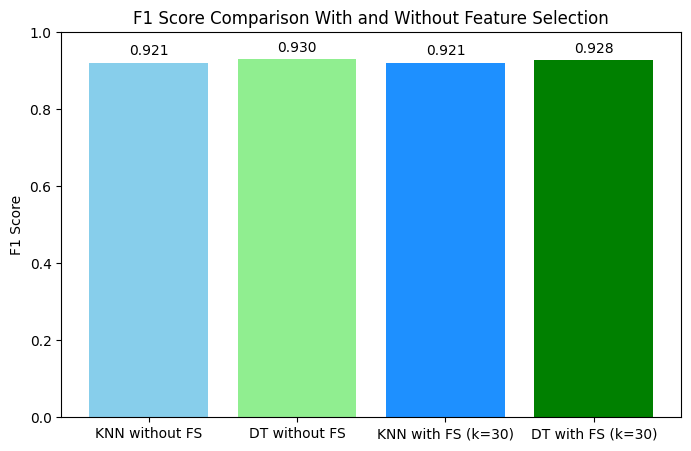

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [19] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [19] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [19] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/

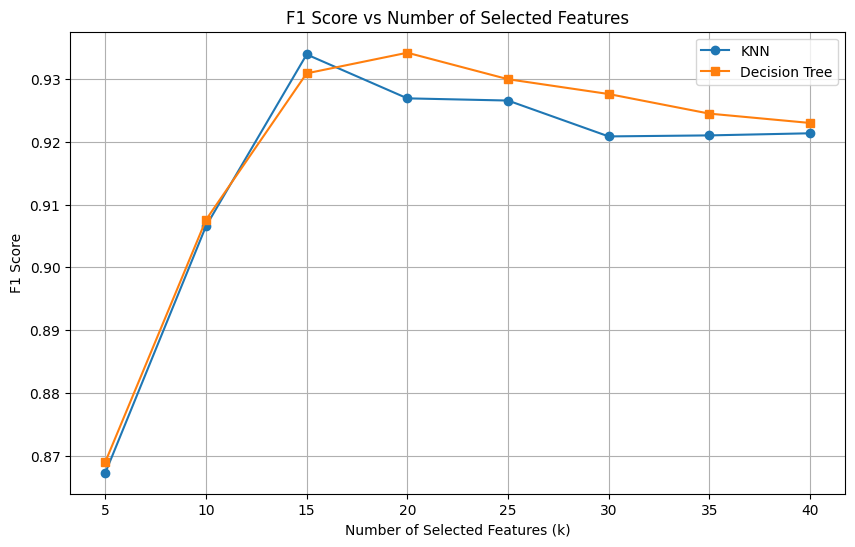

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report


df_train = pd.read_csv('/kdd_train.csv')
df_test = pd.read_csv('/kdd_test.csv')


y_train = df_train['labels'].apply(lambda x: 0 if x == 'normal' else 1)
y_test = df_test['labels'].apply(lambda x: 0 if x == 'normal' else 1)

X_train = df_train.drop('labels', axis=1)
X_test = df_test.drop('labels', axis=1)


for col in ['protocol_type', 'service', 'flag']:
    if col in X_train.columns:
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = X_test[col].map(lambda s: '<unknown>' if s not in le.classes_ else s)
        le.classes_ = np.append(le.classes_, '<unknown>')
        X_test[col] = le.transform(X_test[col])

# --- Without Feature Selection ---

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN without FS
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
f1_knn_no_fs = f1_score(y_test, y_pred_knn)

# Train Decision Tree without FS
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
f1_dt_no_fs = f1_score(y_test, y_pred_dt)

print(f"F1 KNN without FS: {f1_knn_no_fs:.4f}")
print(f"F1 DT without FS: {f1_dt_no_fs:.4f}")

# --- With Feature Selection

k_best_count = 30
selector = SelectKBest(score_func=f_classif, k=k_best_count)
selector.fit(X_train, y_train)
X_train_sel = selector.transform(X_train)
X_test_sel = selector.transform(X_test)

scaler_fs = StandardScaler()
X_train_sel_scaled = scaler_fs.fit_transform(X_train_sel)
X_test_sel_scaled = scaler_fs.transform(X_test_sel)

knn_fs = KNeighborsClassifier(n_neighbors=5)
knn_fs.fit(X_train_sel_scaled, y_train)
y_pred_knn_fs = knn_fs.predict(X_test_sel_scaled)
f1_knn_fs = f1_score(y_test, y_pred_knn_fs)

dt_fs = DecisionTreeClassifier(random_state=42)
dt_fs.fit(X_train_sel, y_train)
y_pred_dt_fs = dt_fs.predict(X_test_sel)
f1_dt_fs = f1_score(y_test, y_pred_dt_fs)

print(f"F1 KNN with FS (k={k_best_count}): {f1_knn_fs:.4f}")
print(f"F1 DT with FS (k={k_best_count}): {f1_dt_fs:.4f}")

# --- Bar chart

labels = ['KNN without FS', 'DT without FS', f'KNN with FS (k={k_best_count})', f'DT with FS (k={k_best_count})']
scores = [f1_knn_no_fs, f1_dt_no_fs, f1_knn_fs, f1_dt_fs]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue', 'lightgreen', 'dodgerblue', 'green'])
plt.ylim(0,1)
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison With and Without Feature Selection')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{yval:.3f}", ha='center')
plt.show()

# --- Vary k_best_count and plot F1 scores ---

k_values = list(range(5, min(60, X_train.shape[1])+1, 5))  # from 5 to max features step 5
f1_knn_list = []
f1_dt_list = []

for k in k_values:
    selector_k = SelectKBest(score_func=f_classif, k=k)
    selector_k.fit(X_train, y_train)
    X_train_k = selector_k.transform(X_train)
    X_test_k = selector_k.transform(X_test)

    scaler_k = StandardScaler()
    X_train_k_scaled = scaler_k.fit_transform(X_train_k)
    X_test_k_scaled = scaler_k.transform(X_test_k)

    knn_k = KNeighborsClassifier(n_neighbors=5)
    knn_k.fit(X_train_k_scaled, y_train)
    y_pred_knn_k = knn_k.predict(X_test_k_scaled)
    f1_knn_list.append(f1_score(y_test, y_pred_knn_k))

    dt_k = DecisionTreeClassifier(random_state=42)
    dt_k.fit(X_train_k, y_train)
    y_pred_dt_k = dt_k.predict(X_test_k)
    f1_dt_list.append(f1_score(y_test, y_pred_dt_k))

plt.figure(figsize=(10,6))
plt.plot(k_values, f1_knn_list, marker='o', label='KNN')
plt.plot(k_values, f1_dt_list, marker='s', label='Decision Tree')
plt.xlabel('Number of Selected Features (k)')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Number of Selected Features')
plt.legend()
plt.grid(True)
plt.show()


--- Without Feature Selection ---
KNN train time (no FS): 0.0358s
Decision Tree train time (no FS): 0.9973s

--- With Feature Selection ---


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [19] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


KNN train time (with FS): 0.0212s
Decision Tree train time (with FS): 0.7566s


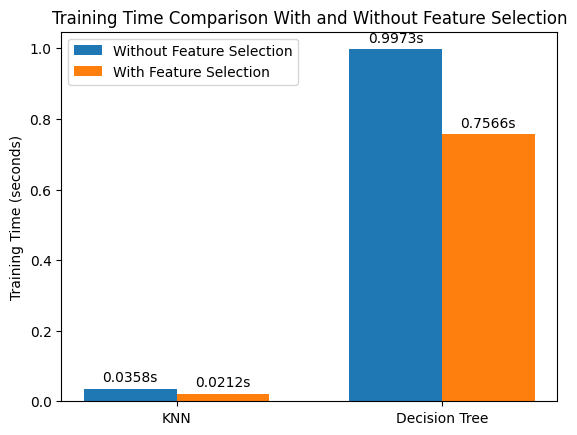

In [19]:
import time
import matplotlib.pyplot as plt
import numpy as np

# Assuming you already have X_train, X_test, y_train, y_test loaded and preprocessed

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

# Without Feature Selection
print("--- Without Feature Selection ---")

# Scale entire dataset for KNN
scaler_full = StandardScaler()
X_train_scaled_full = scaler_full.fit_transform(X_train)
X_test_scaled_full = scaler_full.transform(X_test)

# Time KNN training
start = time.time()
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled_full, y_train)
knn_train_time = time.time() - start

# Time Decision Tree training
start = time.time()
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)  # Tree doesn't need scaling
dt_train_time = time.time() - start

print(f"KNN train time (no FS): {knn_train_time:.4f}s")
print(f"Decision Tree train time (no FS): {dt_train_time:.4f}s")

# With Feature Selection
print("\n--- With Feature Selection ---")
k_best_count = 30
selector = SelectKBest(score_func=f_classif, k=k_best_count)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Scale selected features for KNN
scaler_fs = StandardScaler()
X_train_scaled_fs = scaler_fs.fit_transform(X_train_selected)
X_test_scaled_fs = scaler_fs.transform(X_test_selected)

# Time KNN training on selected features
start = time.time()
knn_fs = KNeighborsClassifier(n_neighbors=5)
knn_fs.fit(X_train_scaled_fs, y_train)
knn_fs_train_time = time.time() - start

# Time Decision Tree training on selected features
start = time.time()
dt_fs = DecisionTreeClassifier(random_state=42)
dt_fs.fit(X_train_selected, y_train)
dt_fs_train_time = time.time() - start

print(f"KNN train time (with FS): {knn_fs_train_time:.4f}s")
print(f"Decision Tree train time (with FS): {dt_fs_train_time:.4f}s")

# Plotting training time comparison

methods = ['KNN', 'Decision Tree']
times_no_fs = [knn_train_time, dt_train_time]
times_fs = [knn_fs_train_time, dt_fs_train_time]

x = np.arange(len(methods))  # label locations
width = 0.35  # bar width

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, times_no_fs, width, label='Without Feature Selection')
rects2 = ax.bar(x + width/2, times_fs, width, label='With Feature Selection')

ax.set_ylabel('Training Time (seconds)')
ax.set_title('Training Time Comparison With and Without Feature Selection')
ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.legend()

# Add labels on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}s',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()


16. Can you summarise the benefits and challenges for feature selection from your experience? (just couple of sentences from your own words)

In [ ]:
Feature selection helps improve model performance by reducing noise and overfitting, speeding up training, and making models easier to interpret.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# 1. Create the selector to find the top 10 features
selector = SelectKBest(score_func=f_classif, k=10)

# 2. Fit it on training data to find the best features
selector.fit(X_train, y_train)

# 3. Transform the data to keep only the selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)